１次式 $ y = ax + b $ は x と y の直線的な関係を推定する回帰式ですが、回帰は１次式だけではありません。<br><br>
　　$ y = w_0 + w_1x_1 + w_2 x_2 + w_3x_3 + $ ・・・$ + w_pw_p $ <br><br>
のような$w_0, w_1, w_2$・・・$w_px_p$を求める線形重回帰問題として定式化されています。<br>
ここで、$p=1, x_1=x^2, w_1=a, w_0=b$ とすれば２次曲線の線形回帰問題になります。<br><br>
　　$ y = ax^2 + b$


係数 [[3.13217689]]
切片 [1.81258781]
決定係数 0.9278858966097023


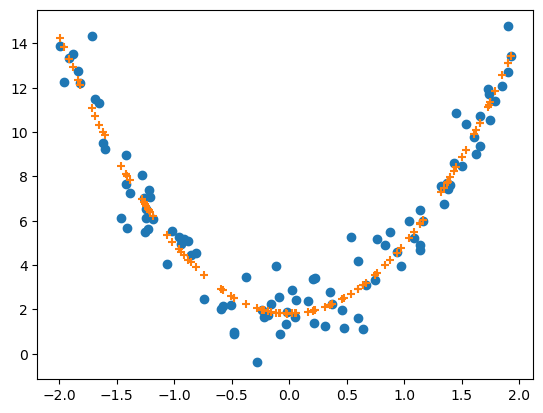

In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np


### バラつきのある y = ax^2 +b のデータを作成
a=3
b=2

x = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x = x * 4 - 2               # 値の範囲を -2 〜 2 に変更

y = a * x**2 + b  

y += np.random.randn(100, 1)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える

### 学習
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x**2, y)  # x を二乗して渡す

### 係数、切片、決定係数を表示
print('係数', model.coef_)
print('切片', model.intercept_)
print('決定係数', model.score(x**2, y))

### グラフ表示
plt.scatter(x, y, marker ='o')
plt.scatter(x, model.predict(x**2), marker='+')  # predict にも x を二乗して渡す
plt.show()


べき乗級数
テイラー展開、テイラー級数
マクローリン展開


回帰式$y = ax^2 + b$ は x と y の関係が２乗になっていましたが、実際には式がわからない方が一般的です。
そのような場合には、べき乗級数を使って x と y の関係を推定します。<br><br>
　　$ f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$・・・<br><br>
つぎのプログラムは$ y = sin(x) + 0.3*x$にバラつきを加えた曲線に対してべき乗級数(３次式)で x と y の関係を推定しています。
学習モデルがバラつきのあるデータの中心付近にフィットしているのがわかります。式の次数を上げるとさらに複雑な曲線にフィットできまが、
過学習が発生しやすくなります。

係数 [-0.10170526  0.01514852  1.1771999 ]
切片 -0.020475818657682738
決定係数 0.9033319421832476


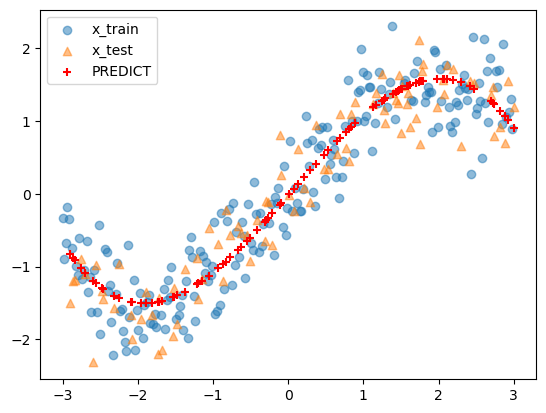

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 乱数のシード値を指定することで，再現性を保つ 
np.random.seed(seed=0)

### バラつきのある y = sin(x) +0.3xのデータを作成
m = 300
x = np.linspace(-3, 3, m)
y = np.sin(x) + 0.3*x
y += np.random.randn(m)*0.4  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3,random_state = 0)

X_TRAIN = pd.DataFrame({'x3':x_train**3,
                        'x2':x_train**2,
                        'x1':x_train})

X_TEST = pd.DataFrame({'x3':x_test**3,
                        'x2':x_test**2,
                        'x1':x_test})

### 学習
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_TRAIN, y_train)  # 


### 係数、切片、決定係数を表示

print('係数', model.coef_)
print('切片', model.intercept_)

print('決定係数', model.score(X_TEST, y_test))

### グラフ表示

plt.scatter(x_train, y_train, alpha=0.5,marker='o', label='x_train')
plt.scatter(x_test, y_test, alpha=0.5,marker='^', label='x_test')
plt.scatter(x_test, model.predict(X_TEST), marker='+', color='red', label='PREDICT')
plt.legend()
plt.show()


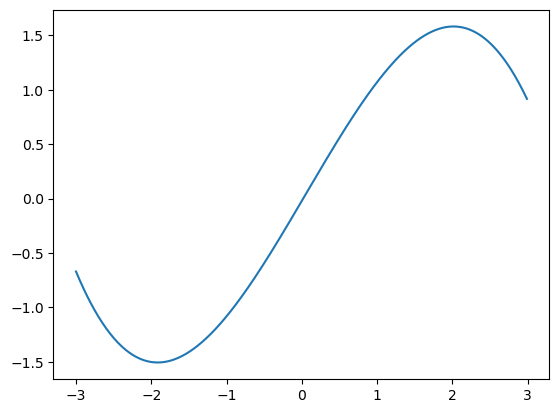

In [3]:
x = np.arange(-3,3,0.01)
a,b,c = model.coef_
y = a*x**3 + b*x**2 + c*x + model.intercept_
plt.plot(x, y)
plt.show()

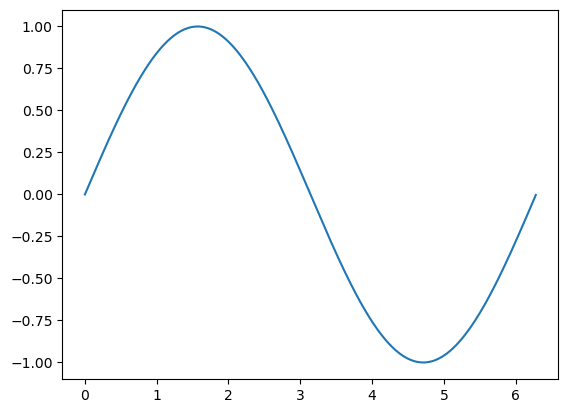

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,2*np.pi,0.01)
#X = -x**23/25852016738884976640000 + x**21/51090942171709440000 - x**19/121645100408832000 + x**17/355687428096000 - x**15/1307674368000 + x**13/6227020800 - x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x
X = -x**23/math.factorial(23) + x**21/math.factorial(21) - x**19/math.factorial(19) + x**17/math.factorial(17) - x**15/math.factorial(15) + x**13/math.factorial(13) - x**11/math.factorial(11) + x**9/math.factorial(9) - x**7/math.factorial(7) + x**5/math.factorial(5) - x**3/math.factorial(3) + x
plt.plot(x,X)
plt.show()
